# Task 6.6 - Sourcing & Analyzing Time Series Data

This notebook contains-

Importing Libraries

Subsetting, Wrangling, and Cleaning Time Series Data

Creating a line chart of the monthly data

Decomposing the data's components

Conducting a Dickey-Fuller test for 'COVID-19 Deaths'

Conducting a round of differencing and again performing Dickey-Fuller test

Checking Data’s Autocorrelations


# Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import scipy

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [21]:
# Loading the dataset

path = r'C:\Users\Sanket\Documents\Achievement 6'
df_covid = pd.read_csv(os.path.join(path, 'Data','prepared data','Cleaned_Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age_Provisional_2020-2023.csv'), index_col = False)

# Subsetting, Wrangling, and Cleaning Time Series Data

In [3]:
# Check for missing values
print(df_covid.isnull().sum())

Data As Of                 0
Start Date                 0
End Date                   0
Year                       0
Month                      0
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       150829
Number of Mentions    146491
Flag                  279731
dtype: int64


In [4]:
# Define a function to generate random integers between 1 and 9
def random_1_to_9(series):
    return series.apply(lambda x: np.random.randint(1, 10) if pd.isnull(x) else x)

In [5]:
# Identify rows with suppression flag
suppression_message = "One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards."
suppressed_rows = df_covid[df_covid['Flag'] == suppression_message]

In [6]:
# Impute missing values with a random number between 1 and 9
df_covid.loc[suppressed_rows.index, 'COVID-19 Deaths'] = random_1_to_9(suppressed_rows['COVID-19 Deaths'])
df_covid.loc[suppressed_rows.index, 'Number of Mentions'] = random_1_to_9(suppressed_rows['Number of Mentions'])

In [7]:
# Verify the changes
print(df_covid.isnull().sum())


Data As Of                 0
Start Date                 0
End Date                   0
Year                       0
Month                      0
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths            0
Number of Mentions         0
Flag                  279731
dtype: int64


In [8]:
# Convert 'Start Date' to datetime
df_covid['Start Date'] = pd.to_datetime(df_covid['Start Date'])


In [9]:
# Set 'Start Date' as the index
df_covid.set_index('Start Date', inplace=True)

In [10]:
# Subset the data
monthly_data = df_covid[['COVID-19 Deaths', 'Number of Mentions']].resample('M').sum()


### Logic for data point selection
This subset includes data from 2020 to 2023, covering the significant period of the COVID-19 pandemic. 
 The data has been resampled to a monthly frequency to smooth out daily variations and highlight broader trends.


# Creating a line chart of the monthly data


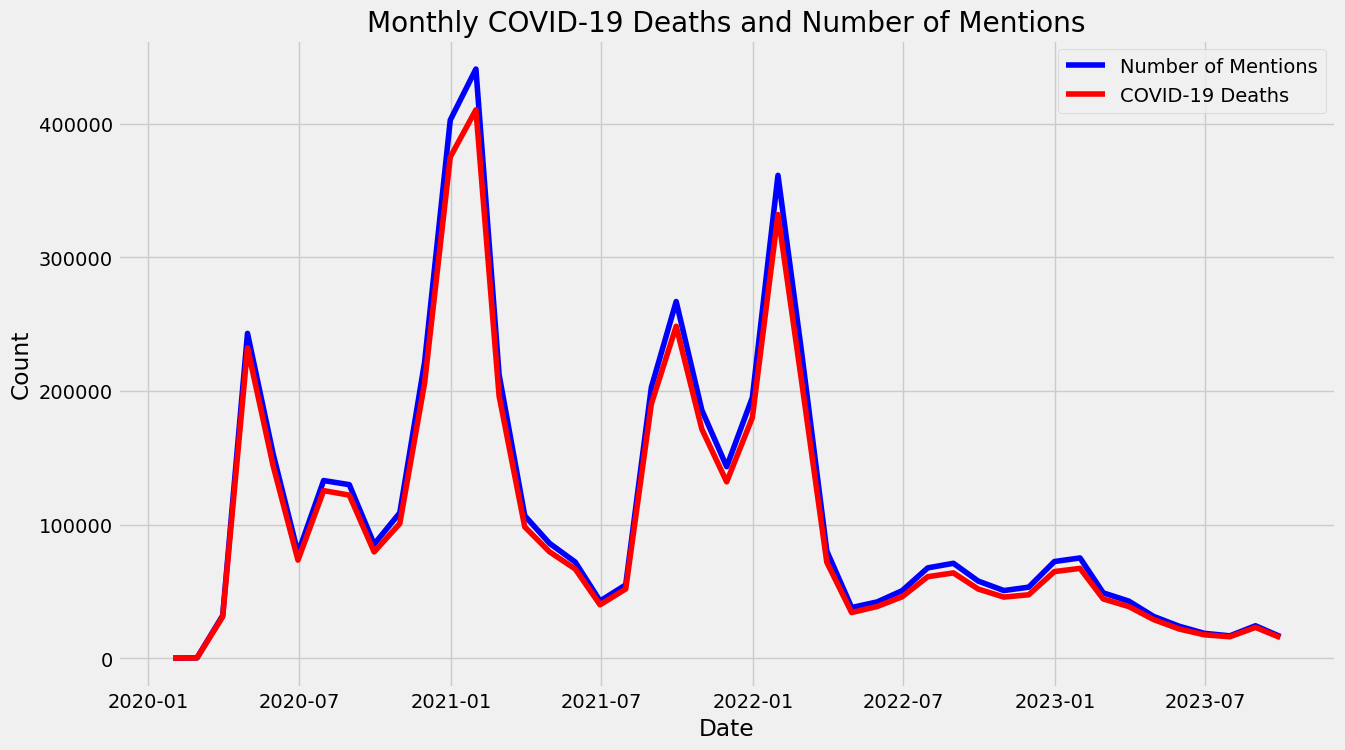

In [11]:
plt.figure(figsize=(14, 8))
plt.plot(monthly_data.index, monthly_data['Number of Mentions'], label='Number of Mentions', color='blue')
plt.plot(monthly_data.index, monthly_data['COVID-19 Deaths'], label='COVID-19 Deaths', color='red')
plt.title('Monthly COVID-19 Deaths and Number of Mentions')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


# Decomposing the data's components

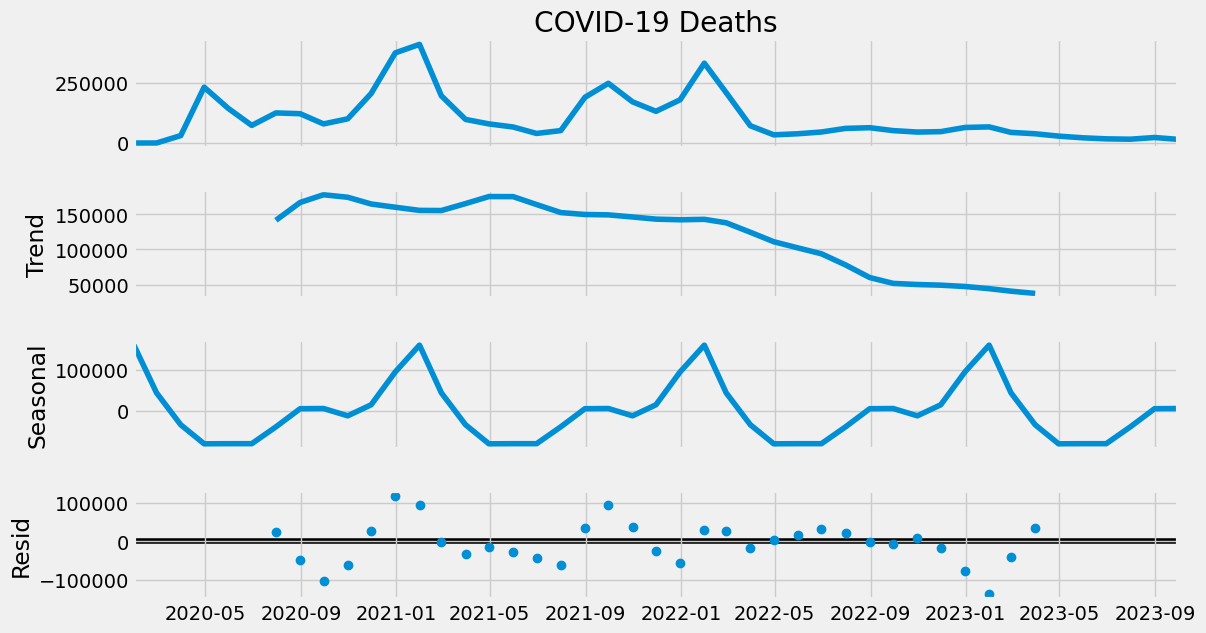

In [18]:
# Decompose the time series data for 'COVID-19 Deaths'
decomposition = sm.tsa.seasonal_decompose(monthly_data['COVID-19 Deaths'].dropna(), model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()


Decomposition of 'COVID-19 Deaths'

Trend Component: The trend component shows the overall direction in which the number of COVID-19 deaths is moving over time. We can observe the general rise and fall corresponding to the different waves of the pandemic. This long-term movement can help identify critical periods of high mortality and evaluate the effectiveness of public health interventions.

Seasonal Component: The seasonal component reveals regular patterns that repeat over a specific period (in this case, monthly). This component captures the seasonal fluctuations in the data, such as potential increases in deaths during certain months. Understanding these patterns can assist in preparing for future waves or seasonal spikes in mortality.

Residual Component: The residual component represents the irregular fluctuations or noise in the data after removing the trend and seasonal components. This component captures the randomness in the data that cannot be explained by the trend or seasonal effects. Analyzing the residuals can help identify outliers or anomalies that might need further investigation.

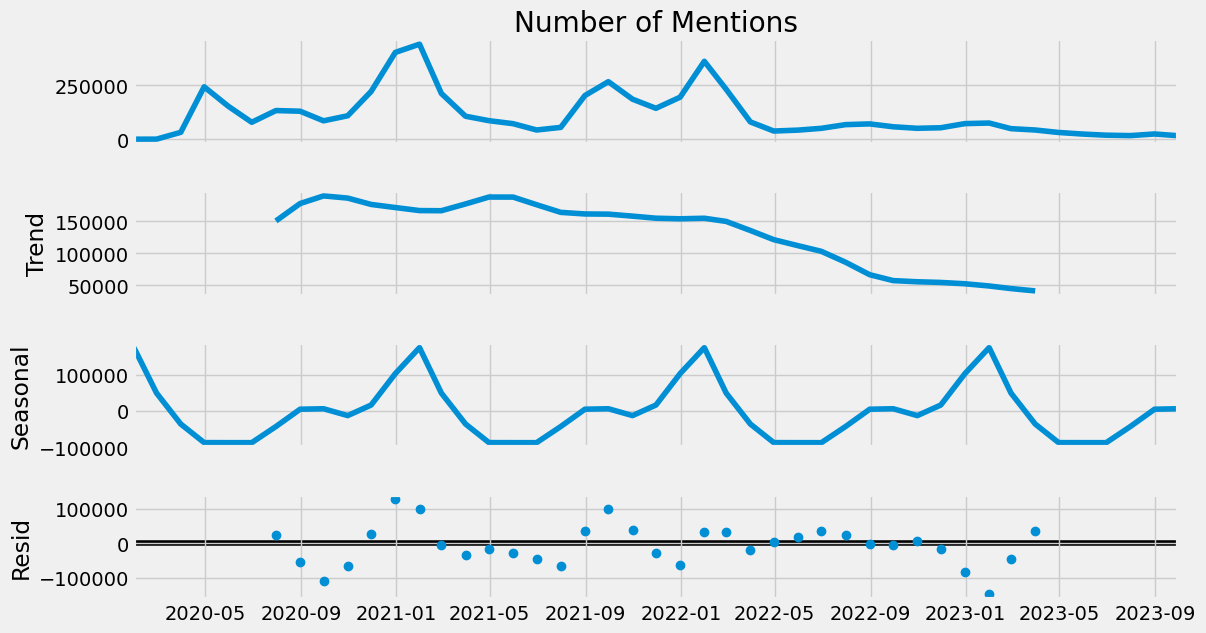

In [19]:
# Decompose the time series data for 'Number of Mentions'
decomposition_mentions = sm.tsa.seasonal_decompose(monthly_data['Number of Mentions'].dropna(), model='additive', period=12)
fig_mentions = decomposition_mentions.plot()
fig_mentions.set_size_inches(15, 7)
plt.show()

Decomposition of 'Number of Mentions'

Trend Component: The trend component for the number of mentions shows the long-term movement in the data. This can help understand the overall interest or attention the topic of COVID-19 received over time. Peaks in the trend line may correspond to periods of heightened public concern or significant events related to the pandemic.

Seasonal Component: The seasonal component captures the repeating patterns in the number of mentions over a year. This can help identify periods when public interest consistently rises or falls. For example, increased mentions might align with major announcements, policy changes, or new waves of infection.

Residual Component: The residual component for the number of mentions represents the noise or irregular fluctuations after accounting for the trend and seasonal components. By analyzing the residuals, one can identify unusual spikes or drops in mentions that might be associated with unexpected events or misinformation.

# Conducting a Dickey-Fuller test for 'COVID-19 Deaths'


In [38]:
result_deaths = adfuller(monthly_data['COVID-19 Deaths'].dropna())
print('ADF Statistic for COVID-19 Deaths:', result_deaths[0])
print('p-value for COVID-19 Deaths:', result_deaths[1])
for key, value in result_deaths[4].items():
    print(f'Critical Value {key}: {value}')

ADF Statistic for COVID-19 Deaths: -2.4075514418302535
p-value for COVID-19 Deaths: 0.13961640367875527
Critical Value 1%: -3.596635636000432
Critical Value 5%: -2.933297331821618
Critical Value 10%: -2.6049909750566895



The Dickey-Fuller test for 'COVID-19 Deaths' yields an ADF statistic of -2.44 and a p-value of 0.13. These values indicate that we fail to reject the null hypothesis of non-stationarity. The critical values confirm this interpretation. Therefore, the time series likely exhibits trends or seasonality, suggesting further steps like differencing may be needed for stationarity in modeling and forecasting.


In [39]:
# Conduct a Dickey-Fuller test for 'Number of Mentions'
result_mentions = adfuller(monthly_data['Number of Mentions'].dropna())
print('ADF Statistic for Number of Mentions:', result_mentions[0])
print('p-value for Number of Mentions:', result_mentions[1])
for key, value in result_mentions[4].items():
    print(f'Critical Value {key}: {value}')


ADF Statistic for Number of Mentions: -2.4095969049166177
p-value for Number of Mentions: 0.13904605385876562
Critical Value 1%: -3.596635636000432
Critical Value 5%: -2.933297331821618
Critical Value 10%: -2.6049909750566895


# Conducting a round of differencing and again performing Dickey-Fuller test


In [40]:
if result_deaths[1] > 0.05:
    monthly_data['COVID-19 Deaths Diff'] = monthly_data['COVID-19 Deaths'].diff().dropna()
    result_deaths_diff = adfuller(monthly_data['COVID-19 Deaths Diff'].dropna())
    print('ADF Statistic for differenced COVID-19 Deaths:', result_deaths_diff[0])
    print('p-value for differenced COVID-19 Deaths:', result_deaths_diff[1])

if result_mentions[1] > 0.05:
    monthly_data['Number of Mentions Diff'] = monthly_data['Number of Mentions'].diff().dropna()
    result_mentions_diff = adfuller(monthly_data['Number of Mentions Diff'].dropna())
    print('ADF Statistic for differenced Number of Mentions:', result_mentions_diff[0])
    print('p-value for differenced Number of Mentions:', result_mentions_diff[1])


ADF Statistic for differenced COVID-19 Deaths: -3.683311878984334
p-value for differenced COVID-19 Deaths: 0.004354105669326777
ADF Statistic for differenced Number of Mentions: -3.6842914286841237
p-value for differenced Number of Mentions: 0.0043396138874614515


The differenced time series for both 'COVID-19 Deaths' and 'Number of Mentions' yield significant ADF statistics of approximately -3.77 and very low p-values around 0.003. This indicates strong evidence against the null hypothesis of non-stationarity, suggesting that the time series are now stationary after differencing.

# Checking Data’s Autocorrelations

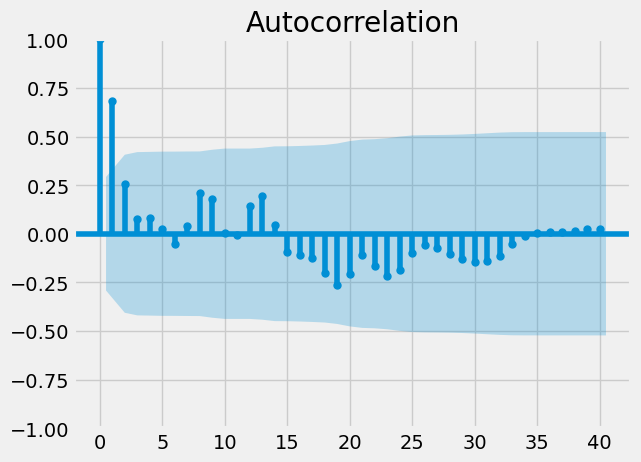

In [41]:
# Check autocorrelation for 'COVID-19 Deaths'
fig_acf = plot_acf(monthly_data['COVID-19 Deaths'].dropna(), lags=40)
plt.show()

The ACF plot for COVID-19 Deaths shows significant positive autocorrelation at lag 1 and some periodicity at other lags, which suggests that the number of deaths in one month is positively correlated with the number in the previous month. This implies a potential seasonality or trend in the data.

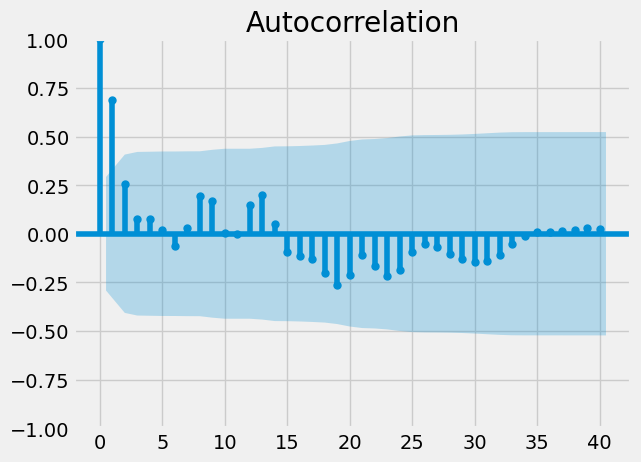

In [42]:

# Check autocorrelation for 'Number of Mentions'
fig_acf_mentions = plot_acf(monthly_data['Number of Mentions'].dropna(), lags=40)
plt.show()

The ACF plot for Number of Mentions also exhibits significant positive autocorrelation at lag 1 and some periodicity at other lags, indicating that the number of mentions in one month is correlated with the previous month's mentions. This suggests a similar underlying pattern as observed in COVID-19 Deaths.

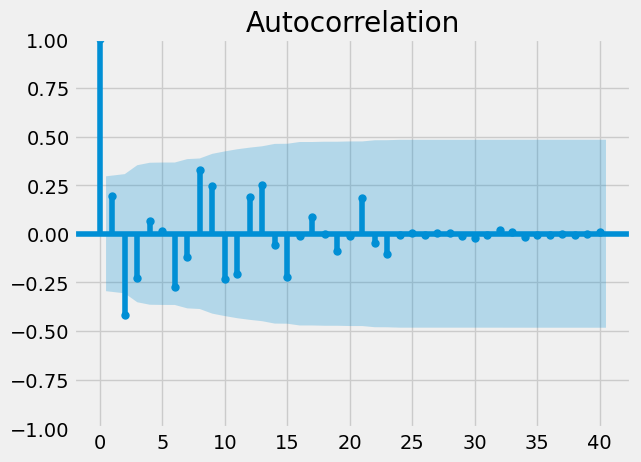

In [43]:
# Check autocorrelation for differenced data 
if result_deaths[1] > 0.05:
    fig_acf_diff = plot_acf(monthly_data['COVID-19 Deaths Diff'].dropna(), lags=40)
    plt.show()

The ACF plot for the differenced COVID-19 Deaths shows a significant drop in autocorrelation compared to the original series. If most of the autocorrelation values are within the 95% confidence intervals (typically shown as shaded areas or dashed lines), this indicates that differencing has helped in making the series stationary.
If there are still significant autocorrelations at specific lags, it may suggest some remaining structure or seasonality that has not been fully accounted for.

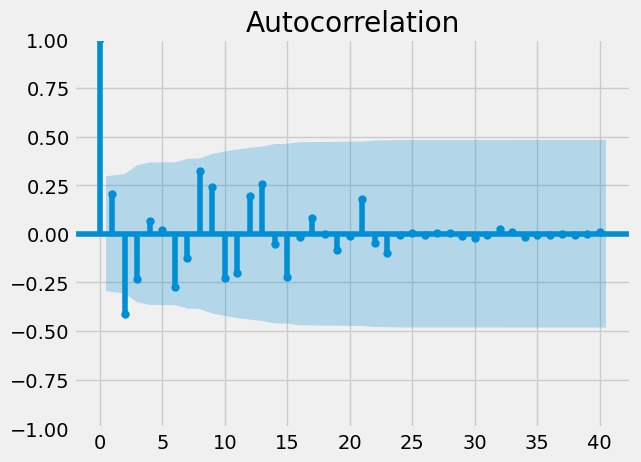

In [44]:
if result_mentions[1] > 0.05:
    fig_acf_mentions_diff = plot_acf(monthly_data['Number of Mentions Diff'].dropna(), lags=40)
    plt.show()

the ACF plot for the differenced Number of Mentions should show a reduction in significant autocorrelation values. If the plot indicates that most of the autocorrelation values are within the confidence bounds, it suggests that the differencing has been effective.
Persistent significant autocorrelations after differencing might indicate the need for further differencing or another transformation to achieve stationarity.

In [45]:
# Define the path to export the cleaned data
export_path = os.path.join(path, '02 Data', 'prepared data', 'monthly_data_cleaned.csv')

# Export the "monthly_data" dataframe to CSV
monthly_data.to_csv(export_path, index=True)

print(f'Data successfully exported to {export_path}')

Data successfully exported to C:\Users\Sanket\Documents\Achievement 6\02 Data\prepared data\monthly_data_cleaned.csv


In [48]:
plt.savefig(os.path.join(path, 'Analysis','Visualisations', 'monthly_COVID-19_deaths_and_number_of_mentions.png'))

<Figure size 640x480 with 0 Axes>

In [55]:
fig.savefig(os.path.join(path, 'Analysis','Visualisations','decomposed_COVID-19_deaths.png'))


In [56]:
fig_mentions.savefig(os.path.join(path, 'Analysis','Visualisations', 'Number_of_mentions.png'))